In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score
%matplotlib inline

In [2]:
mnist_train = pd.read_csv('utech-summer-school-99-Machine-Learning\Datasets\MNIST\mnist_train.csv')
mnist_test = pd.read_csv('utech-summer-school-99-Machine-Learning\Datasets\MNIST\mnist_test.csv')

In [46]:

Data = mnist_train.to_numpy()
np.random.seed = 0
data = Data[np.random.permutation(Data.shape[0])]

test = mnist_test.to_numpy()


In [47]:
X = data[:, 1:]
Y = data[:, 0]

X_test = test[:, 1:]
Y_test = test[:, 0]


label =  7


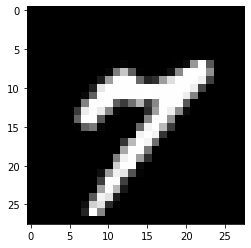

In [5]:
i = 55
img = X[i].reshape(28,28)
plt.imshow(img, cmap='gray')
print('label = ', Y[i])

In [6]:
X_data_std = X/255
X_test_std = X_test/255

In [48]:
X_train = X_data_std[:48000]
X_val = X_data_std[48000:60000]

Y_train = Y[:48000]
Y_val = Y[48000:60000]

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

train_scores = []
test_scores = []
for c in np.arange(0.1, 100, 1):
    clf = LogisticRegression(C=c, multi_class='ovr', class_weight='balance', verbose=1, penalty='l2', n_jobs = -1)
    clf.fit(X_train, Y_train)
    
    train_scores.append(clf.score(X_train, Y_train))
    test_scores.append(clf.score(X_test_std, Y_test))

plt.plot(np.arange(0.1, 100, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(0.1, 100, 1), np.array(test_scores), 'r-')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   32.8s remaining:   21.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   39.9s remaining:   26.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   49.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   35.5s remaining:   23.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   46.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   38.8s remaining:   25.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   47.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  9.2min remaining:  6.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 11.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   11.1s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.2min remaining:   46.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.8min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

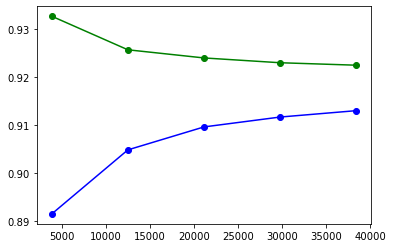

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

clf = LogisticRegression(C=0.1, multi_class='ovr', class_weight='balance', verbose=1, penalty='l2', n_jobs = -1)
clf.fit(X_train, Y_train)

# Overfitting and Underfitting
train_sizes, train_score, test_score = learning_curve(clf, X_train, Y_train, cv=5)
plt.plot(train_sizes, train_score.mean(axis=1), 'go-')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-')

In [11]:
# Final Precision on Validation Dataset
h_val = clf.predict(X_val)
print('validation precision:', precision_score(Y_val, h_val, average='weighted'))

validation precision: 0.9093707953222966


# SVM

In [ ]:
from sklearn.svm import SVC

train_scores = []
test_scores = []
for c in np.arange(0.1, 10, 0.5):
    clf = SVC(C=c, kernel='rbf', class_weight='balanced')
    clf.fit(X_train, Y_train)
    
    train_scores.append(clf.score(X_train, Y_train))
    test_scores.append(clf.score(X_test_std, Y_test))

plt.plot(np.arange(0.1, 10, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(0.1, 10, 1), np.array(test_scores), 'r-')

0.9845833333333334
0.951


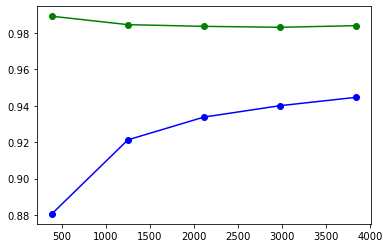

In [14]:
from sklearn.svm import SVC

clf = SVC(C=1, kernel='rbf', class_weight='balanced')
clf.fit(X_train, Y_train)

# Overfitting and Underfitting
train_sizes, train_score, test_score = learning_curve(clf, X_train, Y_train, cv=5)
plt.plot(train_sizes, train_score.mean(axis=1), 'go-')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-')

print(clf.score(X_train, Y_train))
print(clf.score(X_test_std, Y_test))

In [16]:
# Final Precision on Validation Dataset
h_val = clf.predict(X_val)
print('validation precision:', precision_score(Y_val, h_val, average='weighted'))

validation precision: 0.9557839260802117


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 100,5):
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', n_jobs=-1)
    clf.fit(X_train, Y_train)
    
    train_scores.append(clf.score(X_train, Y_train))
    test_scores.append(clf.score(X_test_std, Y_test))

plt.plot(np.arange(1, 100, 5), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 100, 5), np.array(test_scores), 'r-')

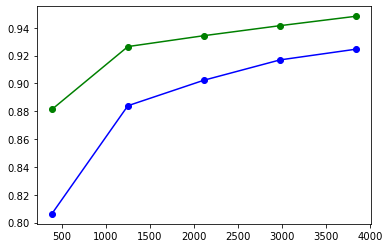

In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', n_jobs=-1)
clf.fit(X_train, Y_train)

# Overfitting and Underfitting
train_sizes, train_score, test_score = learning_curve(clf, X_train, Y_train, cv=5)
plt.plot(train_sizes, train_score.mean(axis=1), 'go-')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-')

In [18]:
# Final Precision on Validation Dataset
h_val = clf.predict(X_val)
print('validation precision:', precision_score(Y_val, h_val, average='weighted'))

validation precision: 0.9488780480859509


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

train_scores = []
test_scores = []
for d in range(1, 14):
    clf = DecisionTreeClassifier(max_depth=d, class_weight='balanced')
    clf.fit(X_train, Y_train)
    
    train_scores.append(clf.score(X_train, Y_train))
    test_scores.append(clf.score(X_test_std, Y_test))

plt.plot(np.arange(1, 14, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 14, 1), np.array(test_scores), 'r-')

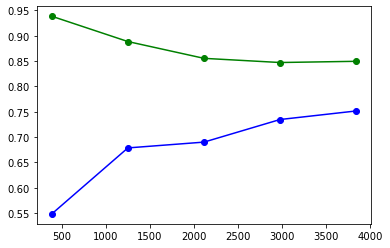

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=7, class_weight='balanced')
clf.fit(X_train, Y_train)

# Overfitting and Underfitting
train_sizes, train_score, test_score = learning_curve(clf, X_train, Y_train, cv=5)
plt.plot(train_sizes, train_score.mean(axis=1), 'go-')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-')

In [21]:
# Final Precision on Validation Dataset
h_val = clf.predict(X_val)
print('validation precision:', precision_score(Y_val, h_val, average='weighted'))

validation precision: 0.7830174859231471


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_acc = []
test_acc = []

for n in range(1, 200, 10):
    clf = RandomForestClassifier(n_estimators=n, max_depth=7, class_weight='balanced', criterion='entropy', n_jobs=-1)
    clf.fit(X_train, Y_train)
    
    train_acc.append(clf.score(X_train, Y_train))
    test_acc.append(clf.score(X_test_std, Y_test))
    
plt.plot(train_acc, 'b-')
plt.plot(test_acc, 'r-')

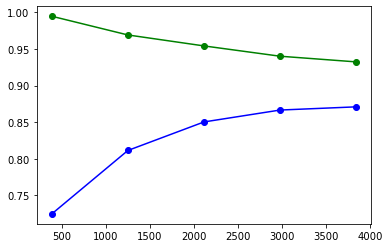

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=7, class_weight='balanced', criterion='entropy', n_jobs=-1)
clf.fit(X_train, Y_train)

# Overfitting and Underfitting
train_sizes, train_score, test_score = learning_curve(clf, X_train, Y_train, cv=5)
plt.plot(train_sizes, train_score.mean(axis=1), 'go-')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-')

In [23]:
# Final Precision on Validation Dataset
h_val = clf.predict(X_val)
print('validation precision:', precision_score(Y_val, h_val, average='weighted'))

validation precision: 0.8822661326707876


# Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

train_acc = []
test_acc = []

for n in range(5, 200, 10):
    clf = MLPClassifier(hidden_layer_sizes=(n,), activation='relu', solver='adam', learning_rate='constant')
    clf.fit(X_train, Y_train)
    
    train_acc.append(clf.score(X_train, Y_train))
    test_acc.append(clf.score(X_test_std, Y_test))
    
plt.plot(train_acc, 'b-')
plt.plot(test_acc, 'r-')

C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\neural_network\_

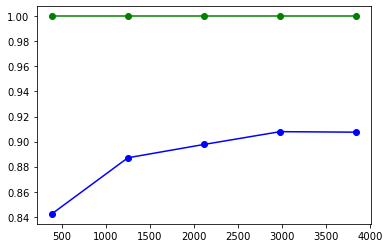

In [24]:
from sklearn.neural_network import MLPClassifier

clf =  MLPClassifier(hidden_layer_sizes=(25,), activation='relu', solver='adam', learning_rate='constant')
clf.fit(X_train, Y_train)

# Overfitting and Underfitting
train_sizes, train_score, test_score = learning_curve(clf, X_train, Y_train, cv=5)
plt.plot(train_sizes, train_score.mean(axis=1), 'go-')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-')

In [25]:
# Final Precision on Validation Dataset
h_val = clf.predict(X_val)
print('validation precision:', precision_score(Y_val, h_val, average='weighted'))

validation precision: 0.921939541188956


# Testing Data on Final Model

test score: 0.951
train score: 0.9845833333333334
*****************************************
test precision: 0.9509540597786336
train precision: 0.9846683589115897
*****************************************
test recall: 0.951
train recall: 0.9845833333333334
*****************************************
test f1-score: 0.9508937328824216
train f1-score: 0.9845721976405908


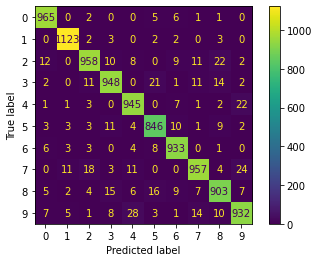

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix

# First best
clf = SVC(C=1, kernel='rbf', class_weight='balanced')
clf.fit(X_train, Y_train)

# Second best
#clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', n_jobs=-1)
#clf.fit(X_train, Y_train)

# Third best
#clf =  MLPClassifier(hidden_layer_sizes=(25,), activation='relu', solver='adam', learning_rate='constant')
#clf.fit(X_train, Y_train)

h_train = clf.predict(X_train)
h_test = clf.predict(X_test_std)

# Precision, Recall, Accuracy, and f1_score
print('test score:', clf.score(X_test_std, Y_test))
print('train score:', clf.score(X_train, Y_train))
print('*****************************************')
print('test precision:', precision_score(Y_test, h_test, average='weighted'))
print('train precision:', precision_score(Y_train, h_train, average='weighted'))
print('*****************************************')
print('test recall:', recall_score(Y_test, h_test, average='weighted'))
print('train recall:', recall_score(Y_train, h_train, average='weighted'))
print('*****************************************')
print('test f1-score:', f1_score(Y_test, h_test, average='weighted'))
print('train f1-score:', f1_score(Y_train, h_train, average='weighted'))

#Confiusion Matrix
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
disp = plot_confusion_matrix(clf, X_test_std, Y_test, display_labels = class_names)

In [38]:
# Bagging

from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(SVC(C=1, kernel='rbf', class_weight='balanced'), n_estimators=10, max_samples=150, n_jobs=-1)
clf.fit(X_train, Y_train)
print(clf.score(X_train, Y_train))
print(clf.score(X_test_std, Y_test))


0.8683333333333333
0.863


In [45]:
# Boosting

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier (base_estimator=None , n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
clf.fit(X_train, Y_train)
print(clf.score(X_train, Y_train))
print(clf.score(X_test_std, Y_test))

0.735
0.7124
